In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from typing import Callable, List, Tuple

In [2]:
class Function:
    def __init__(self, func: Callable, x0: np.float16, x1: np.float16, epsilon: np.float16, maxit: int=20, derivative: Callable=None):
        """
        ARGS:
            func = Função analisada **(deve ser passada como função lambda)**
            x0 = Valor de x0 (menor)
            x1 = Valor de x1 (maior)
            epsilon = Tolerância de erro
            maxit = Máximo de iterações
            derivative (opcional) = Derivada da função **(essencial para o método de Newton)**
        """
        self.func = func
        self.x0 = x0
        self.x1 = x1
        self.epsilon = epsilon
        self.maxit = maxit
        self.derivative = derivative

    def _table(self, data: List[float], titles: List[str]) -> pd.DataFrame:
        """
        Cria a tabela com as informações de cada iteração

        ARGS:
            title = Título da tabela
            values = Valores da tabela
        """
        pd.options.display.float_format = '{:.5E}'.format
        return pd.DataFrame(data, columns=titles)
    
    def _graph(self, df: pd.DataFrame) -> None:
        """
        Imprime a o gráfico de convergência da função.

        ARGS:
            df = Dataframe gerado pelo método numérico
        """
        iter = np.linspace(0, self.maxit, self.maxit)
        plt.close("all")
        plt.plot(iter, df["f(xk)"])
        plt.xlabel("Número de iterações")
        plt.ylabel("Valor de f(x)")
        plt.grid()
        plt.show()

    def printFormated(self, df: pd.DataFrame) -> None:
        """
        Imprime a tabela segundo a formatação requisitada pelo exercício.

        ARGS:
            df = Dataframe gerado pelo método numérico
        """
        print(df.to_string(index=False, justify='center'))

    def bisect(self) -> Tuple[float, pd.DataFrame]:
        """
        Calcula a aproximação da raiz da função pelo método da bisseção.
        """
        # Variáveis iniciais
        a, b = self.x0, self.x1
        table_title = ['k', 'xk', 'f(xk)', 'step']
        table = []
        # Loop principal
        for i in range(self.maxit):
            step = abs(b - a)
            # Bisseção
            xk = (a + b) / 2
            f_xk = self.func(xk)
            table.append([i + 1, xk, f_xk, step])
            # Lógica de redução
            if (self.func(a) * f_xk < 0):
                b = xk
            else:
                a = xk

            if (step < self.epsilon):
                break
            
        full_table = self._table(table, table_title)
        self._graph(full_table)
        return f_xk, full_table

    def newton(self) -> Tuple[float, pd.DataFrame]:
        """
        Calcula a aproximação da raiz da função pelo método de Newton.
        """
        # Verificação inicial, a fim de evitar erro de divisão por None
        if not callable(self.derivative):
            raise ValueError("A derivada da função (derivative) não foi fornecida ou não é uma função.")
        # Variáveis iniciais  
        xk = self.x0
        table_title = ['k', 'xk', 'f(xk)', 'f\'(xk)', 'step']
        table = []
        # Loop principal
        for i in range(self.maxit):
            _xk = xk
            f_xk = self.func(xk)
            f_dxk = self.derivative(xk)
            xk = xk - (f_xk / f_dxk) # x_{k+1}
            step = abs(xk - _xk)

            table.append([i + 1, xk, self.func(xk), self.derivative(xk), step])

        full_table = self._table(table, table_title)
        self._graph(full_table)
        return self.func(xk), full_table

    def secant(self) -> Tuple[float, pd.DataFrame]:
        """
        Calcula a aproximação da raiz da função pelo método da secante.
        """
        # Variáveis iniciais
        xk0, xk1 = self.x0, self.x1
        table = []
        table_title = ['k', 'xk', 'f(xk)', 'step']
        # Loop principal
        for i in range(self.maxit):
            f_xk0 = self.func(xk0)
            f_xk1 = self.func(xk1)

            den = xk0 * f_xk1 - xk1 * f_xk0
            num = f_xk1 - f_xk0

            xk0 = xk1 # x_k se torna x_{k-1}
            xk1 = den / num # x_k se torna x_{k-1}
            step = (xk1 - xk0)

            table.append([i + 1, xk1, self.func(xk1), step])

        full_table = self._table(table, table_title)
        self._graph(full_table)
        return self.func(xk1), full_table

---
primeira função

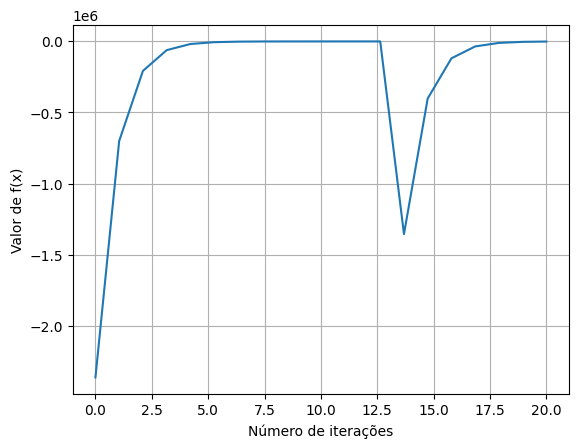

In [3]:
# Variáveis da entrada do método
# IMPORTANTE: SEMPRE DEFINA O TIPO DA VARIÁVEL COMO "FLOAT16"
f1 = lambda x: np.power(x, 3) - x - 3 # função
fd1 = lambda x: 3*np.power(x,2) - 1 # derivada da função
x0_1 = 0.57 # ponto inicial x0 ou extremidade a
x0_2 = 0.62
x1 = np.pi / 2 # ponto inicial x1 ou extremidade b
eps = 10e-8 # tolerância
maxit = 20 # máximo de iterações
func1 = Function(f1, x0_1, x1, eps, maxit=maxit, derivative=fd1)
func2 = Function(f1, x0_2, x1, eps, maxit=maxit, derivative=fd1)
# Aplica o método
app1, df1 = func1.newton()

---
segunda função

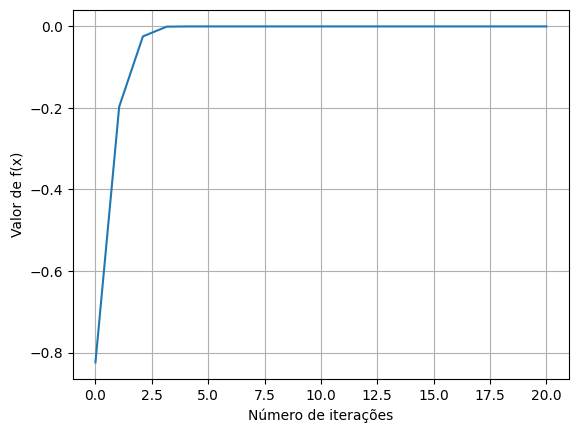

In [4]:
# Variáveis da entrada do método
# IMPORTANTE: SEMPRE DEFINA O TIPO DA VARIÁVEL COMO "FLOAT16"
f2 = lambda x: x*np.exp(-x, dtype="float16") # função
fd2 = lambda x: np.exp(-x, dtype="float16") - x*np.exp(-x, dtype="float16") # derivada da função
x0 = 0.5 # ponto inicial x0 ou extremidade a
x1 = np.pi / 2 # ponto inicial x1 ou extremidade b
eps = 10e-8 # tolerância
maxit = 20 # máximo de iterações
func = Function(f2, x0, x1, eps, maxit=maxit, derivative=fd2)
# Aplica o método
app2, df2 = func.newton()

In [6]:
# Imprime a tabela
func.printFormated(df1)
# Imprime a saída requisitada
print(f"\nSAIDA 1")
it = df1.last_valid_index() + 1
print(f"x_{it} = {df1["xk"][it - 1]}")
print(f"f(x_{it}) = {app1}")
print(f"n = {it}")

# Imprime a tabela
func.printFormated(df2)
# Imprime a saída requisitada
print(f"\nSAIDA 2")
it = df2.last_valid_index() + 1
print(f"x_{it} = {df2["xk"][it - 1]}")
print(f"f(x_{it}) = {app2}")
print(f"n = {it}")

 k      xk          f(xk)       f'(xk)        step   
 1 -1.33217E+02 -2.36403E+06  5.32392E+04 1.33787E+02
 2 -8.88128E+01 -7.00445E+05  2.36622E+04 4.44040E+01
 3 -5.92109E+01 -2.07533E+05  1.05168E+04 2.96019E+01
 4 -3.94774E+01 -6.14878E+04  4.67440E+03 1.97335E+01
 5 -2.63233E+01 -1.82165E+04  2.07774E+03 1.31542E+01
 6 -1.75558E+01 -5.39629E+03  9.23624E+02 8.76742E+00
 7 -1.17133E+01 -1.59838E+03  4.10606E+02 5.84253E+00
 8 -7.82059E+00 -4.73500E+02  1.82485E+02 3.89273E+00
 9 -5.22586E+00 -1.40490E+02  8.09288E+01 2.59473E+00
10 -3.48989E+00 -4.20145E+01  3.55379E+01 1.73597E+00
11 -2.30764E+00 -1.29810E+01  1.49756E+01 1.18224E+00
12 -1.44083E+00 -4.55033E+00  5.22798E+00 8.66811E-01
13 -5.70452E-01 -2.61518E+00 -2.37525E-02 8.70379E-01
14 -1.10672E+02 -1.35543E+06  3.67438E+04 1.10102E+02
15 -7.37832E+01 -4.01603E+05  1.63309E+04 3.68887E+01
16 -4.91917E+01 -1.18989E+05  7.25846E+03 2.45916E+01
17 -3.27985E+01 -3.52530E+04  3.22623E+03 1.63931E+01
18 -2.18715E+01 -1.04437E+04